In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hw_3_data.csv", header = 0)

In [3]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,lbl
0,-0.105348,-0.765285,-0.105348,0.284124,0.430165,-0.496225,-1.630323,0.430165,-0.371408,-0.368030,0.0
1,0.078798,0.255358,0.078798,-0.464293,-0.340239,0.242046,0.539097,-0.340239,0.367130,-0.215124,0.0
2,0.138852,0.717872,0.138852,1.057301,0.130399,0.191773,1.446804,0.130399,-0.773516,1.043496,3.0
3,0.178963,0.820882,0.178963,1.750779,0.364299,-1.134097,1.618704,0.364299,-1.348497,1.469060,3.0
4,-0.928943,-0.583325,-0.928943,1.632376,1.674338,0.902454,-0.876673,1.674338,-0.345720,2.792298,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
f0     40000 non-null float64
f1     40000 non-null float64
f2     40000 non-null float64
f3     40000 non-null float64
f4     40000 non-null float64
f5     40000 non-null float64
f6     40000 non-null float64
f7     40000 non-null float64
f8     40000 non-null float64
f9     40000 non-null float64
lbl    40000 non-null float64
dtypes: float64(11)
memory usage: 3.4 MB


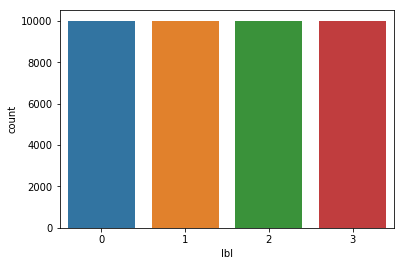

In [5]:
df['lbl'] = pd.to_numeric(df['lbl'], downcast='integer')
ax = sb.countplot(x="lbl", data=df)

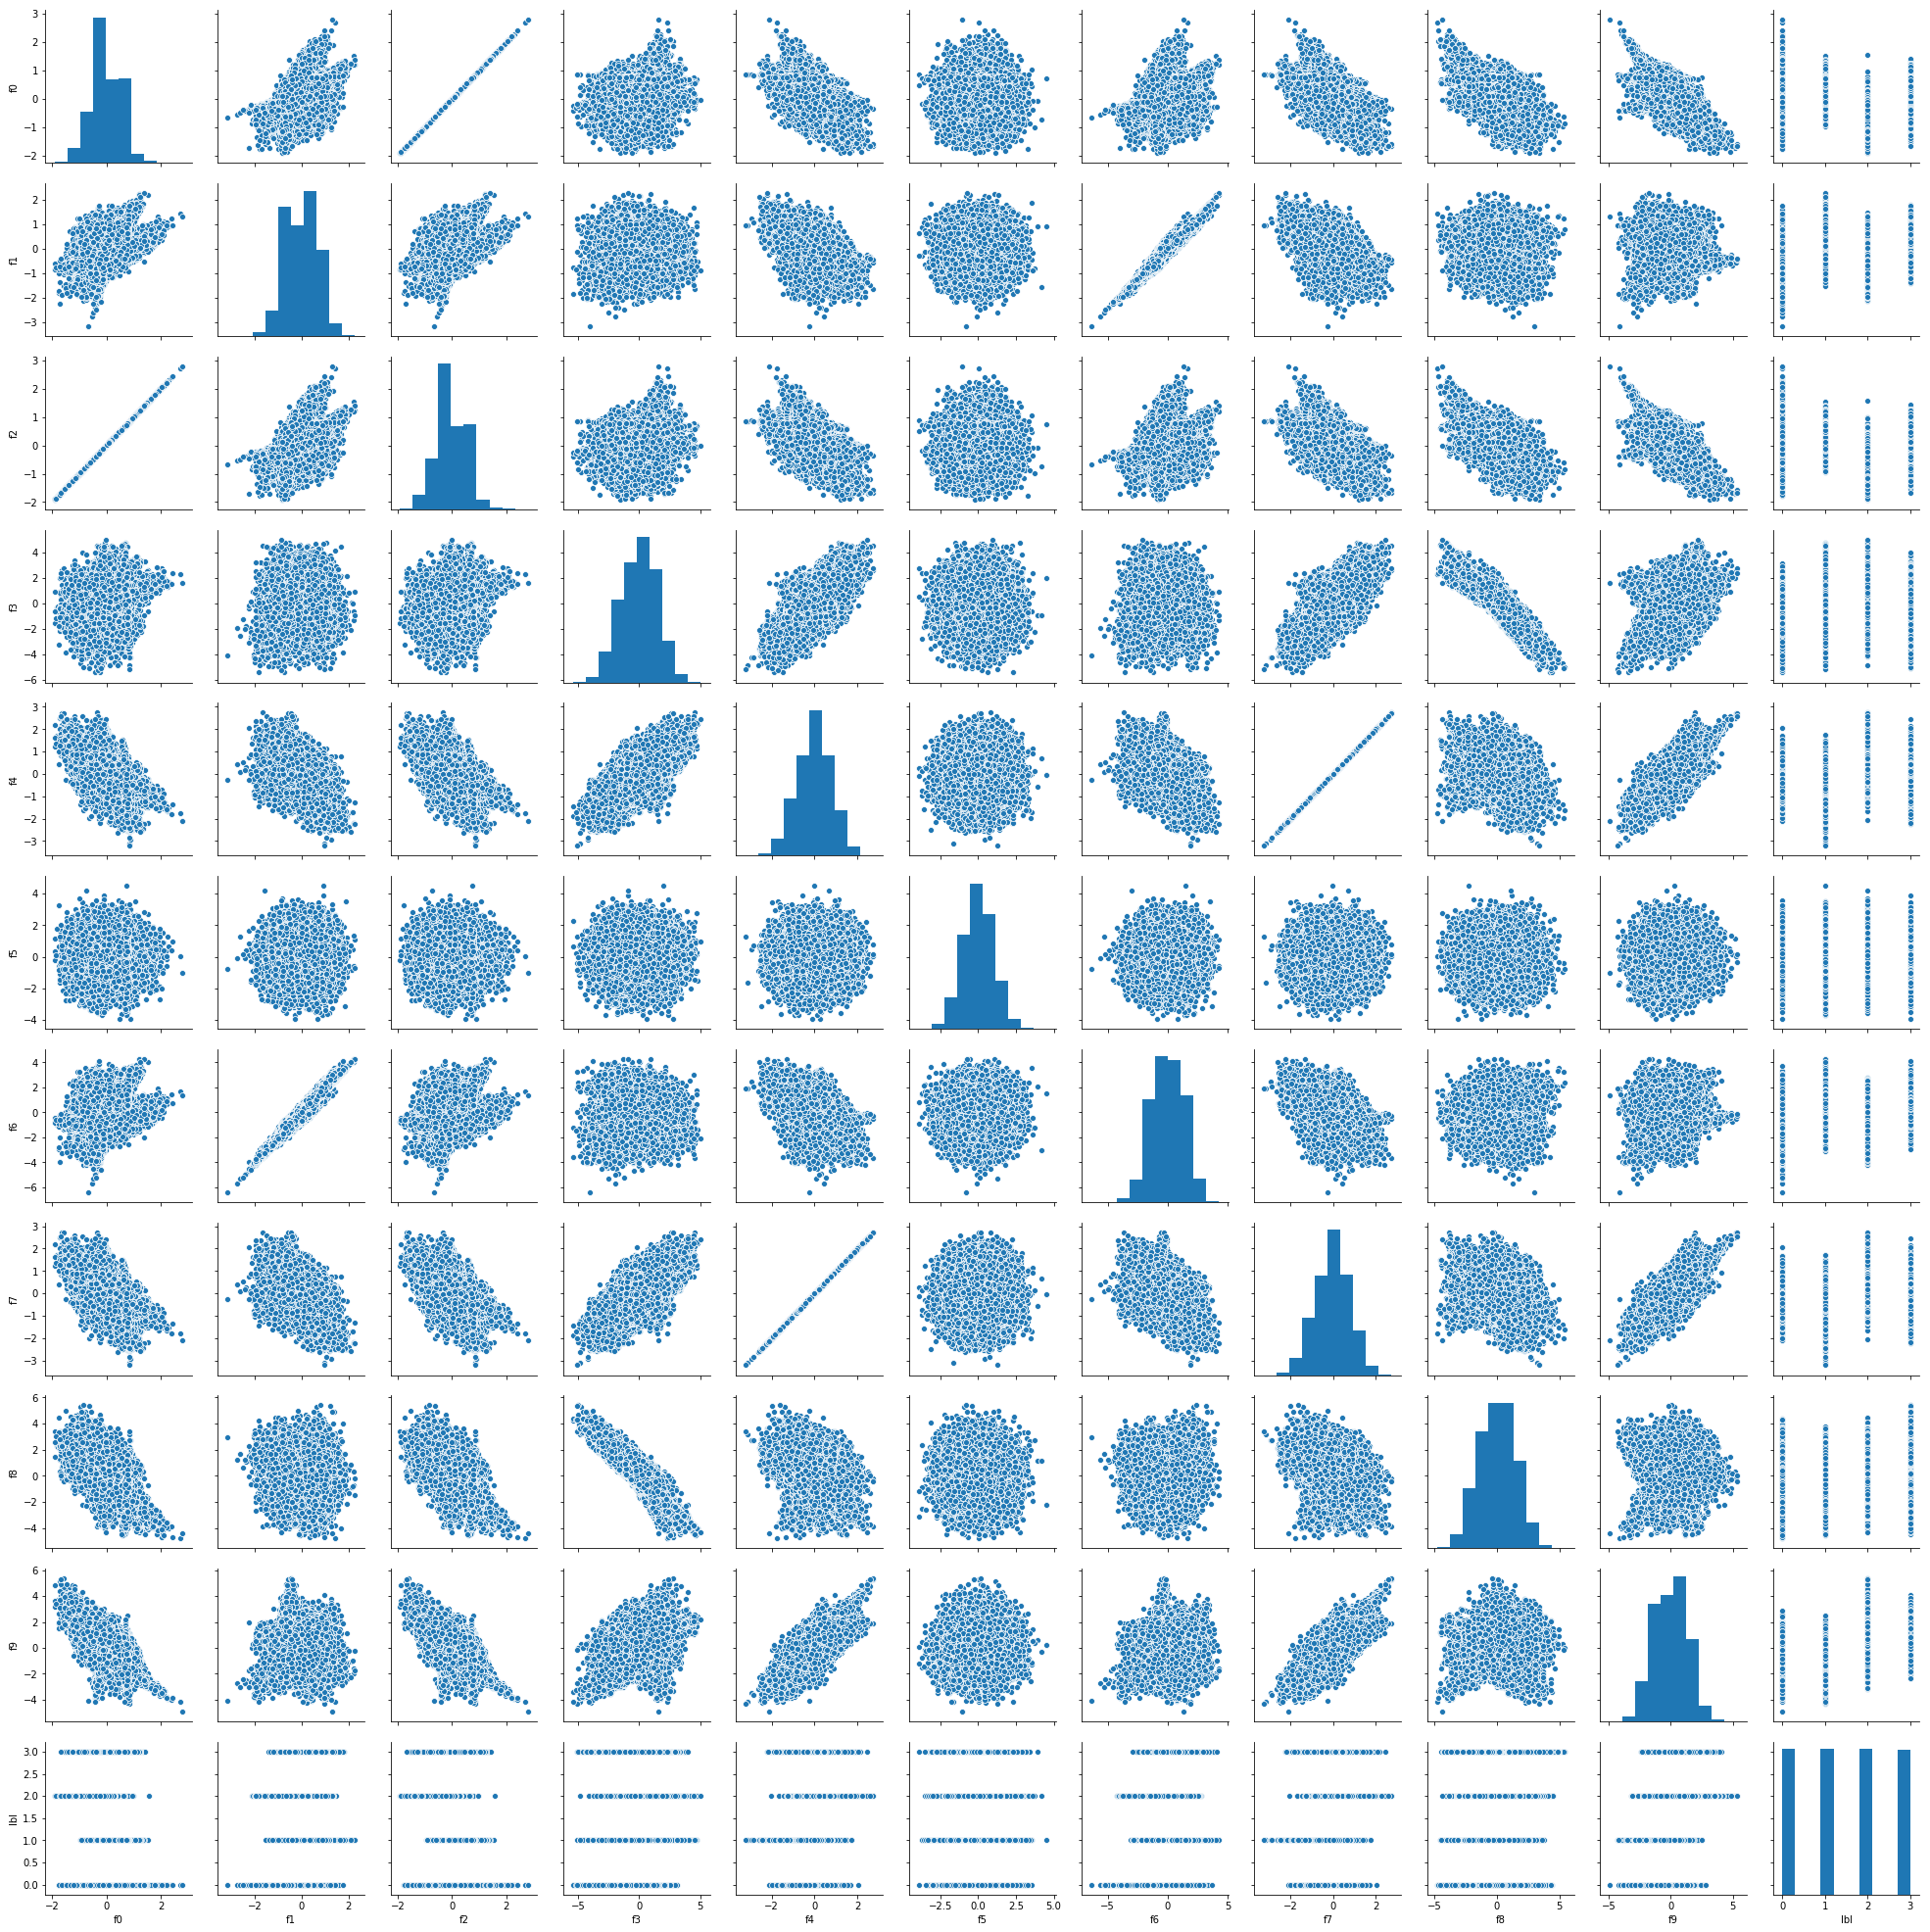

In [6]:
ax = sb.pairplot(df)

In [7]:
#бачимо, що f2 та f0, f4 і f7 лінійно залежні, видаляємо f0,f4
#також бачимо, що f1 дуже корелює з f6, а f3 з f8, видаляємо f1,f8
df = df.drop(columns = ['f0','f1','f4','f8'])

In [8]:
df.head()

,f2,f3,f5,f6,f7,f9,lbl
0,-0.105348,0.284124,-0.496225,-1.630323,0.430165,-0.368030,0
1,0.078798,-0.464293,0.242046,0.539097,-0.340239,-0.215124,0
2,0.138852,1.057301,0.191773,1.446804,0.130399,1.043496,3
3,0.178963,1.750779,-1.134097,1.618704,0.364299,1.469060,3
4,-0.928943,1.632376,0.902454,-0.876673,1.674338,2.792298,2


In [9]:
feats = list(df)[:-1]

def standartize_mean_std(df):
    df_mean = df.mean()
    df_std = df.std()
    df[feats] = (df[feats]-df_mean[feats])/df_std[feats]
    return (df,df_mean,df_std)

In [10]:
df,df_mean,df_std = standartize_mean_std(df)

In [11]:
df.describe()

,f2,f3,f5,f6,f7,f9,lbl
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000
mean,-1.738262e-17,-9.121870e-18,-5.784262e-18,4.066192e-17,3.099188e-17,-7.348289e-19,1.499500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.117668
min,-3.427822e+00,-3.668771e+00,-3.925041e+00,-4.831275e+00,-4.046284e+00,-3.713431e+00,0.000000
25%,-6.247331e-01,-7.145040e-01,-6.810116e-01,-7.695214e-01,-6.981825e-01,-7.779178e-01,1.000000
50%,-1.268828e-01,5.794879e-02,-2.313718e-03,3.998216e-04,1.054407e-01,2.386854e-02,1.000000
75%,7.693091e-01,7.165464e-01,6.784710e-01,7.817150e-01,6.264868e-01,7.621530e-01,2.000000
max,5.018938e+00,3.419279e+00,4.497849e+00,3.230587e+00,3.452607e+00,4.039473e+00,3.000000


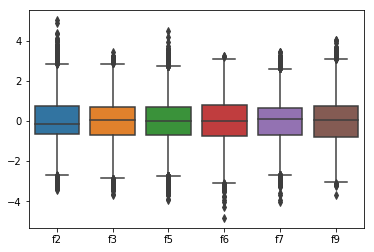

In [12]:
sb.boxplot(data=df[feats])

In [13]:
def del_outliers(dataframe):
    dataset = sorted(dataframe)
    q1, q3= np.percentile(dataset,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    dataframe = dataframe.loc[dataframe > lower_bound]
    dataframe = dataframe.loc[dataframe < upper_bound]
    return dataframe

In [14]:
for i in range(len(feats)):
    df[feats[i]] = del_outliers(df[feats[i]])

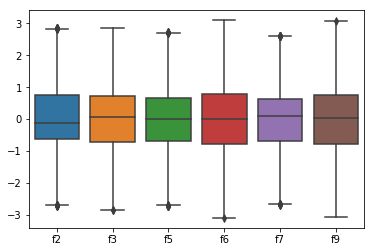

In [15]:
sb.boxplot(data=df[feats])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
f2     39787 non-null float64
f3     39905 non-null float64
f5     39730 non-null float64
f6     39970 non-null float64
f7     39772 non-null float64
f9     39955 non-null float64
lbl    40000 non-null int8
dtypes: float64(6), int8(1)
memory usage: 1.9 MB


In [17]:
def unstandartize_mean_std(df,df_mean,df_std):
    df[feats] = df[feats]*df_std[feats]+df_mean[feats]
    return df

df = df.dropna(axis=0)
df = unstandartize_mean_std(df,df_mean,df_std)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39205 entries, 0 to 39999
Data columns (total 7 columns):
f2     39205 non-null float64
f3     39205 non-null float64
f5     39205 non-null float64
f6     39205 non-null float64
f7     39205 non-null float64
f9     39205 non-null float64
lbl    39205 non-null int8
dtypes: float64(6), int8(1)
memory usage: 2.1 MB


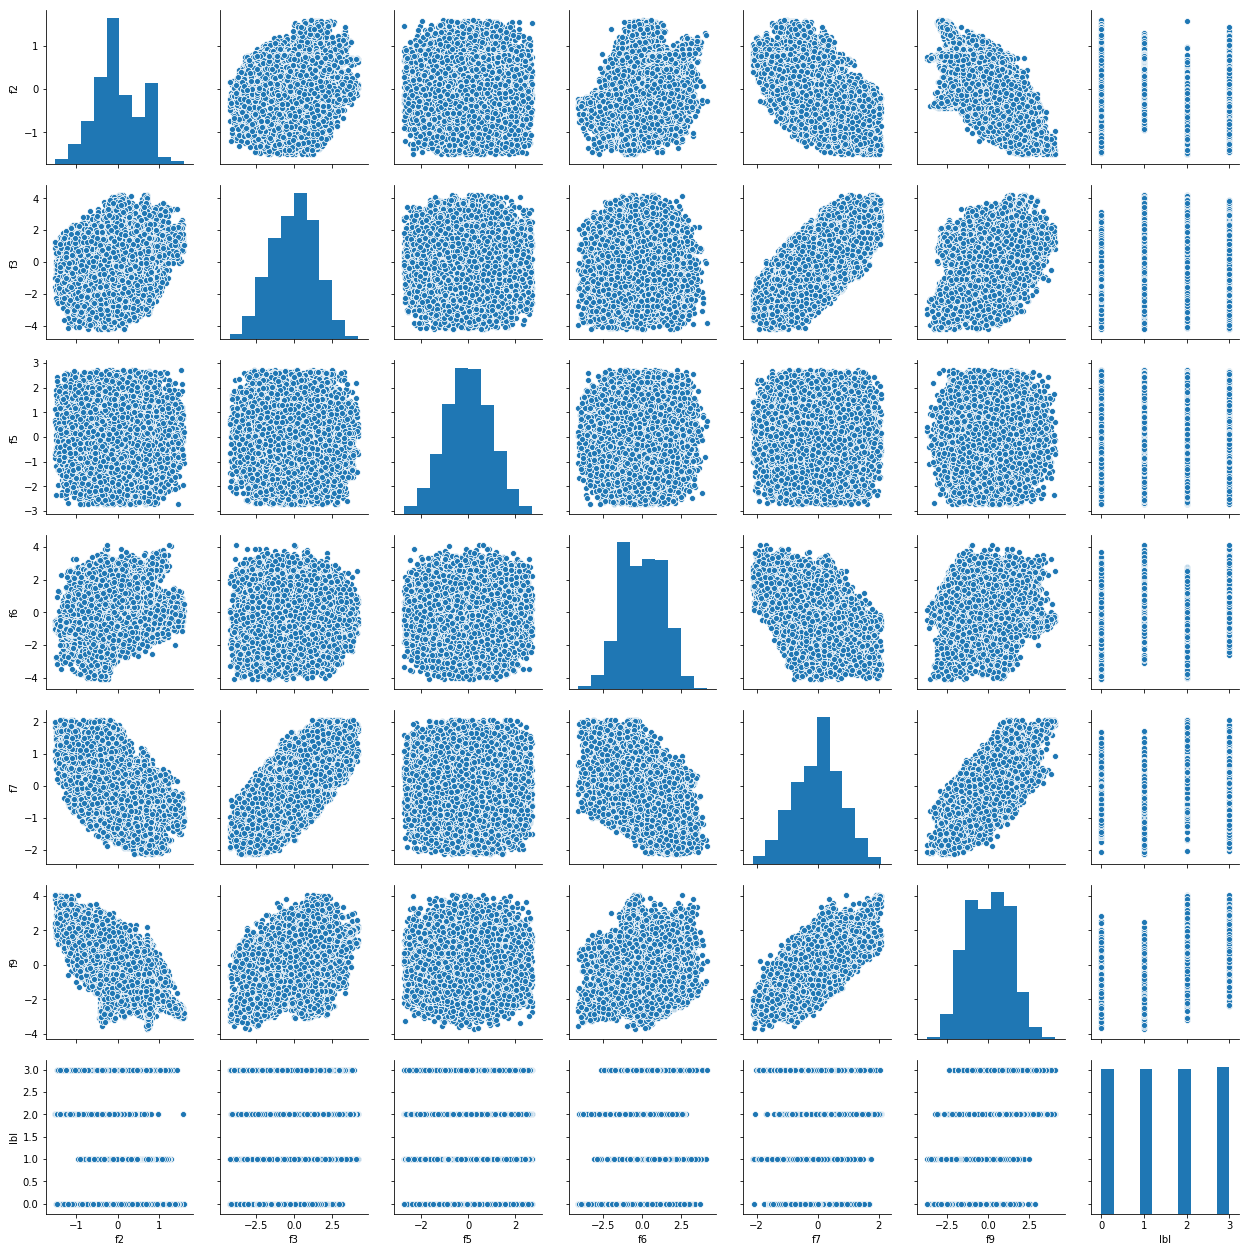

In [19]:
ax = sb.pairplot(df)

In [20]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)

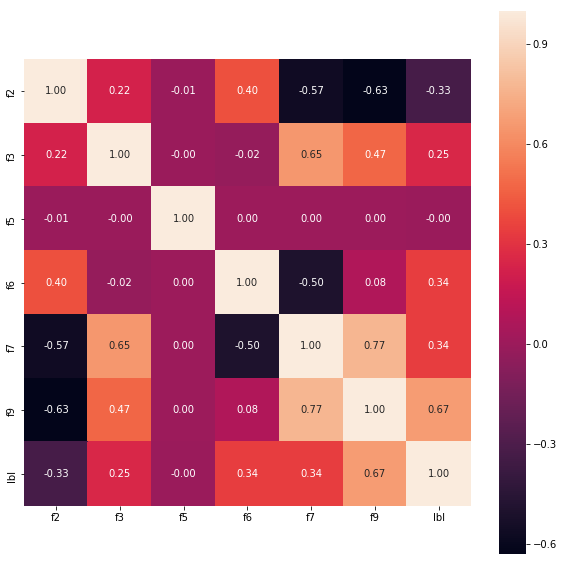

In [21]:
plot_correlation(df[list(df)], list(df))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df[feats].drop(columns = [])
y = df['lbl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7882


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1451  252  216  100]
 [ 188 1581   30  163]
 [ 166    2 1582  137]
 [  93  158  156 1566]]


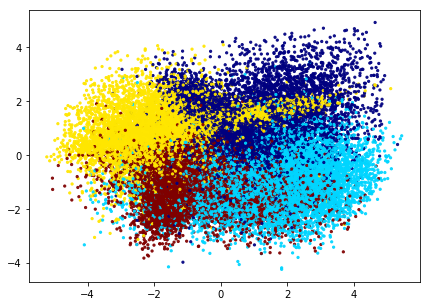

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df2 = pca.fit_transform(df[feats].drop(columns = []))
fig, ax = plt.subplots(1,1, figsize=(7,5))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
scat = ax.scatter(df2.T[0],df2.T[1],c=df['lbl'],cmap=cmap, alpha=0.9, s=5)
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score as acc

In [29]:
X = df[feats].drop(columns = [])
y = df['lbl']
folds = KFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
for train, test in folds.split(X_train):
    metr = []
    mod = GradientBoostingClassifier().fit(X_train.iloc[train], y_train.iloc[train])
    result = mod.predict(X_train.iloc[test])
    metr.append(acc(y_pred=result, y_true=y_train.iloc[test]))
print('GBC Accuracy:', np.sum(metr)/len(metr))

GBC Accuracy: 0.884406887755102


In [30]:
X = df[feats].drop(columns = [])
y = df['lbl']
folds = KFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
for train, test in folds.split(X_train):
    metr = []
    mod = SVC().fit(X_train.iloc[train], y_train.iloc[train])
    result = mod.predict(X_train.iloc[test])
    metr.append(acc(y_pred=result, y_true=y_train.iloc[test]))
print('SVM Accuracy:', np.sum(metr)/len(metr))

SVM Accuracy: 0.8654336734693877


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
parameters_gbc = {'n_estimators' : [100, 150, 250], 'max_depth' : [3, 5, 10]}
parameters_svm = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : [1, 0.1, 2, 4]}
gbc = GradientBoostingClassifier()
svm = SVC()
grid_search_gbc = GridSearchCV(gbc, parameters_gbc, cv = 2)
grid_search_gbc.fit(X_train, y_train)
print(grid_search_gbc.best_params_)
print('GradientBoostingClassifier best for validation:', str(grid_search_gbc.best_score_))

{'max_depth': 5, 'n_estimators': 100}
GradientBoostingClassifier best for validation: 0.8830391456654083


In [32]:
grid_search_svm = GridSearchCV(svm, parameters_svm, cv = 2)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)
print('SVM best for validation:', str(grid_search_svm.best_score_))

{'C': 4, 'kernel': 'rbf'}
SVM best for validation: 0.8672244328809985


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import completeness_score
from sklearn.cluster import DBSCAN

kmeans_labels = KMeans(n_clusters=len(np.unique(df['lbl']))*2).fit_predict(df[feats])

S_metric = silhouette_score(X=df[feats], labels=kmeans_labels, sample_size=400)
C_metric = completeness_score(labels_true=df["lbl"], labels_pred=kmeans_labels)

print(f'Silhouette_score: {S_metric}')
print(f'Completeness_score: {C_metric}')

Silhouette_score: 0.2095415009236282
Completeness_score: 0.290531691801999


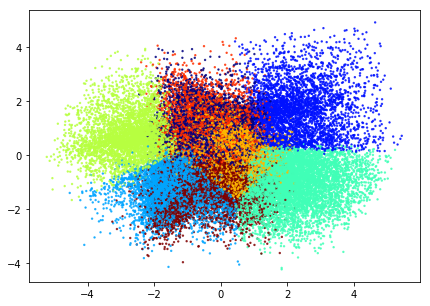

In [34]:
pca = PCA(n_components = 2)
df_2 = pca.fit_transform(df[feats])
fig, ax = plt.subplots(1,1, figsize=(7,5))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
scat = ax.scatter(df_2.T[0],df_2.T[1],c=kmeans_labels,cmap=cmap, alpha=0.75, s=2)
plt.show()

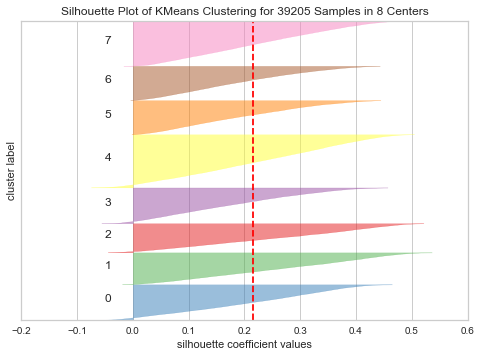

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=len(np.unique(df['lbl']))*2))
visualizer.fit(df[feats])
visualizer.poof()

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=7).fit(df[feats])

In [37]:
S_metric = silhouette_score(X=df[feats], labels=dbscan.labels_, sample_size=400)
C_metric = completeness_score(labels_true=df['lbl'], labels_pred=dbscan.labels_)

print(f'Silhouette_score: {S_metric}')
print(f'Completeness_score: {C_metric}')

Silhouette_score: 0.2815641876774037
Completeness_score: 0.03282247922497957


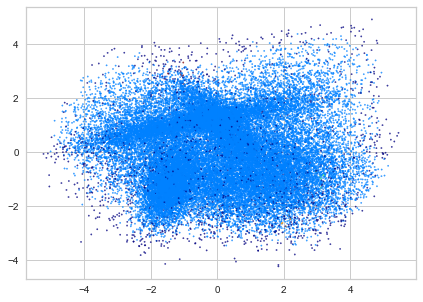

In [38]:
pca = PCA(n_components = 2)
df_2 = pca.fit_transform(df[feats])
fig, ax = plt.subplots(1,1, figsize=(7,5))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
scat = ax.scatter(df_2.T[0],df_2.T[1],c=dbscan.labels_,cmap=cmap, alpha=0.75, s=2)
plt.show()